<a href="https://colab.research.google.com/github/Sherzo21/Electricity-Load-Forecasting-using-Machine-Learning-Methods/blob/main/Electricity_Load_using_LSTM%20Test_set-0.10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!pip install kaggle


In [3]:
from google.colab import files
uploaded = files.upload()

Saving continuous dataset.csv to continuous dataset.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing the dataset
df = pd.read_csv('continuous dataset.csv',
                 index_col=[0],
                  parse_dates=[0])

#Printing head
df.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [6]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df=df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.day_name()
    df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300],
                          labels=['Spring', 'Summer', 'Fall', 'Winter']
                   )
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','weekday',
           'season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(df, label='nat_demand')
features_and_target = pd.concat([X, y], axis=1)

In [7]:
features_and_target

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday,season,nat_demand
datetime,,,,,,,,,,,
2015-01-03 01:00:00,1,5,1,1,2015,3,3,Saturday,Saturday,Winter,970.3450
2015-01-03 02:00:00,2,5,1,1,2015,3,3,Saturday,Saturday,Winter,912.1755
2015-01-03 03:00:00,3,5,1,1,2015,3,3,Saturday,Saturday,Winter,900.2688
2015-01-03 04:00:00,4,5,1,1,2015,3,3,Saturday,Saturday,Winter,889.9538
2015-01-03 05:00:00,5,5,1,1,2015,3,3,Saturday,Saturday,Winter,893.6865
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26 20:00:00,20,4,2,6,2020,178,26,Friday,Friday,Summer,1128.5592
2020-06-26 21:00:00,21,4,2,6,2020,178,26,Friday,Friday,Summer,1112.7488
2020-06-26 22:00:00,22,4,2,6,2020,178,26,Friday,Friday,Summer,1081.5680


In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

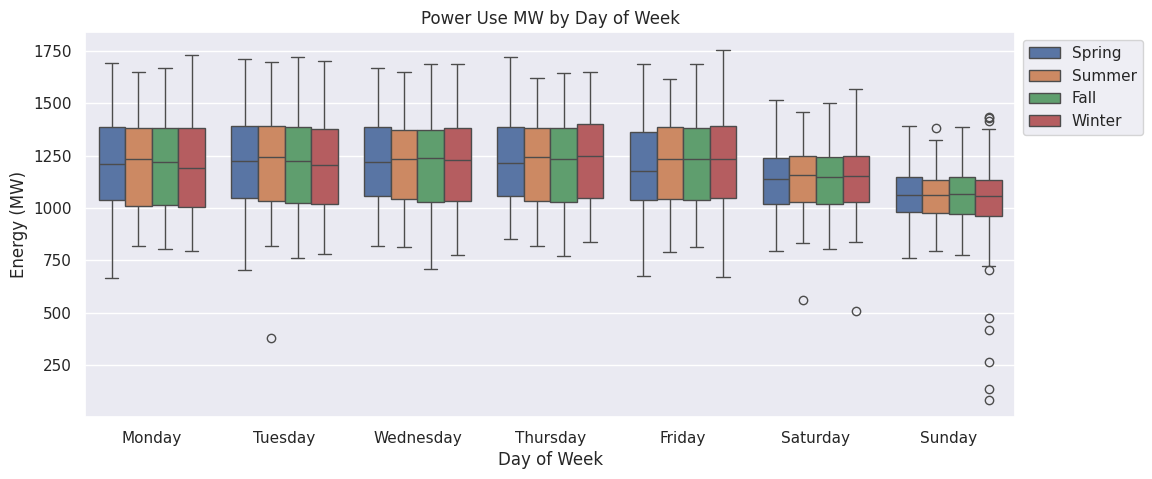

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='weekday',
            y='nat_demand',
            hue='season',
            ax=ax,
            linewidth=1)
ax.set_title('Power Use MW by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Energy (MW)')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

df_new=scaler.fit_transform(df)

In [14]:
df_new

array([[0.53013   , 0.24092133, 0.61321834, ..., 0.        , 0.        ,
        0.        ],
       [0.49529149, 0.24373419, 0.62044907, ..., 0.        , 0.        ,
        0.        ],
       [0.4881604 , 0.24688035, 0.63122024, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.59674299, 0.33242265, 0.78922053, ..., 0.        , 0.        ,
        1.        ],
       [0.57281998, 0.32384519, 0.7906647 , ..., 0.        , 0.        ,
        1.        ],
       [0.55601703, 0.31415167, 0.78852143, ..., 0.        , 0.        ,
        1.        ]])

In [17]:
from sklearn.model_selection import train_test_split

train, test= train_test_split(df_new, test_size=0.10, shuffle= False)

In [18]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input= 10
n_features=16

generatorTrain= TimeseriesGenerator(train, train, length= n_input, batch_size=1)
generatorTest= TimeseriesGenerator(test, test, length= n_input, batch_size=1)

In [19]:
batch_0= generatorTrain[0]

x,y= batch_0

print(x,y)

[[[0.53013    0.24092133 0.61321834 0.03103044 0.55688809 0.19262007
   0.58943876 0.00380735 0.42043674 0.19103092 0.6052925  0.20108292
   0.52063079 0.         0.         0.        ]
  [0.49529149 0.24373419 0.62044907 0.03149883 0.56495521 0.18830926
   0.58885032 0.00271795 0.43487234 0.18520624 0.60066622 0.18338883
   0.54090872 0.         0.         0.        ]
  [0.4881604  0.24688035 0.63122024 0.02969848 0.57229741 0.18542169
   0.58437987 0.00292639 0.4427912  0.18185159 0.59800289 0.16473657
   0.569985   0.         0.         0.        ]
  [0.48198261 0.24855696 0.64270865 0.03122073 0.56351557 0.17999443
   0.57734883 0.00534019 0.42820267 0.18053538 0.59868259 0.14308206
   0.57119564 0.         0.         0.        ]
  [0.48421817 0.24990531 0.6512729  0.03315281 0.53994661 0.17152779
   0.57154895 0.0035468  0.39606027 0.17839439 0.59596808 0.13465022
   0.54472948 0.         0.         0.        ]
  [0.47556135 0.25489473 0.66056586 0.02789813 0.51128702 0.16736563
 

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [21]:
EPOCHS=5

model = Sequential()
model.add(LSTM(64, activation='tanh',return_sequences=True, input_shape=(n_input, n_features)))
model.add(LSTM(units=10, return_sequences=False))
model.add(Dropout(0.25))
model.add(Dense(n_features))
#opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            20736     
                                                                 
 lstm_1 (LSTM)               (None, 10)                3000      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 16)                176       
                                                                 
Total params: 23912 (93.41 KB)
Trainable params: 23912 (93.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.fit(generatorTrain, epochs=EPOCHS, batch_size=72, shuffle=False)

Epoch 1/5
43233/43233 [==============================] - 267s 6ms/step - loss: 0.0094
Epoch 2/5
43233/43233 [==============================] - 249s 6ms/step - loss: 0.0072
Epoch 3/5
43233/43233 [==============================] - 250s 6ms/step - loss: 0.0071
Epoch 4/5
43233/43233 [==============================] - 249s 6ms/step - loss: 0.0070
Epoch 5/5
43233/43233 [==============================] - 248s 6ms/step - loss: 0.0068


In [23]:
x= len(test)
x

4805

In [24]:
import numpy as np



predictions = []

first_batch = train[-n_input:]
current_batch = first_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch,verbose=0)[0]

    # append the prediction into the array
    predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

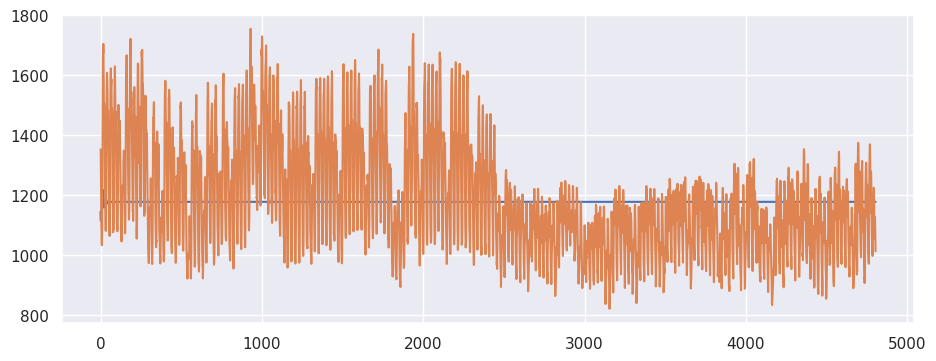

In [25]:
import matplotlib.pyplot as plt
predictions_actual= scaler.inverse_transform(predictions)
test_data_actual= scaler.inverse_transform(test)

plt.plot(predictions_actual[:,0])
plt.plot(test_data_actual[:,0])

In [26]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse= sqrt(mean_squared_error(test_data_actual[:,0],predictions_actual[:,0]))

print('Test RMSE" %.3f' %rmse)

Test RMSE" 181.516
